In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("C:/Users/STUDENT/Desktop/datasets/quora/train.csv")

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.shape

(404290, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [12]:
df["is_duplicate"].unique().tolist()

[0, 1]

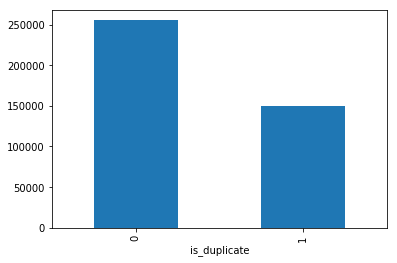

In [16]:
df.groupby("is_duplicate")["id"].count().plot.bar()

In [17]:
df.groupby("is_duplicate")["id"].count()

is_duplicate
0    255027
1    149263
Name: id, dtype: int64

In [21]:
df1=df[df["is_duplicate"]==1]
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [22]:
df0=df[df["is_duplicate"]==0]
df0.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [30]:
print(list(df1[df["id"]==5].question1))
print(list(df1[df["id"]==5].question2))

['Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?']
["I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?"]


C:\Users\STUDENT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\STUDENT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [31]:
print(list(df0[df["id"]==4].question1))
print(list(df0[df["id"]==4].question2))

['Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?']
['Which fish would survive in salt water?']


C:\Users\STUDENT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\STUDENT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [34]:
l=list(df.groupby("is_duplicate")["id"].count())
ones=l[1]/sum(l)
zeros=l[0]/sum(l)

In [38]:
print("percenatge of ones:",ones*100,"%")
print("percentage of zeros:{}%".format(zeros*100))

percenatge of ones: 36.9197853026293 %
percentage of zeros:63.08021469737069%


In [44]:
#total unique quesions
q=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
unique=len(np.unique(q))
unique

537933

In [47]:
#more than one time occuring
onemore=sum(q.value_counts()>1)
onemore

111780

In [49]:
#max count
maxone=max(q.value_counts())
maxone

157

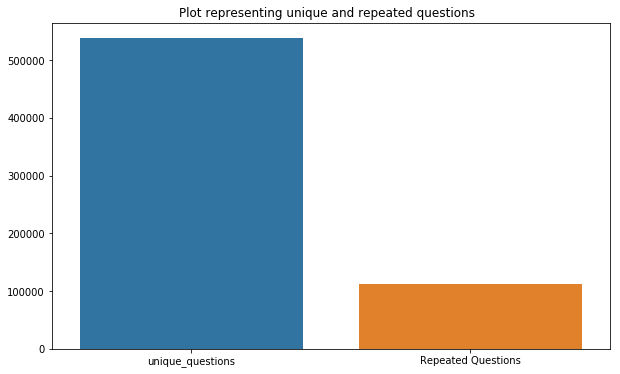

In [57]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique , onemore]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

Text(0, 0.5, 'Number of questions')

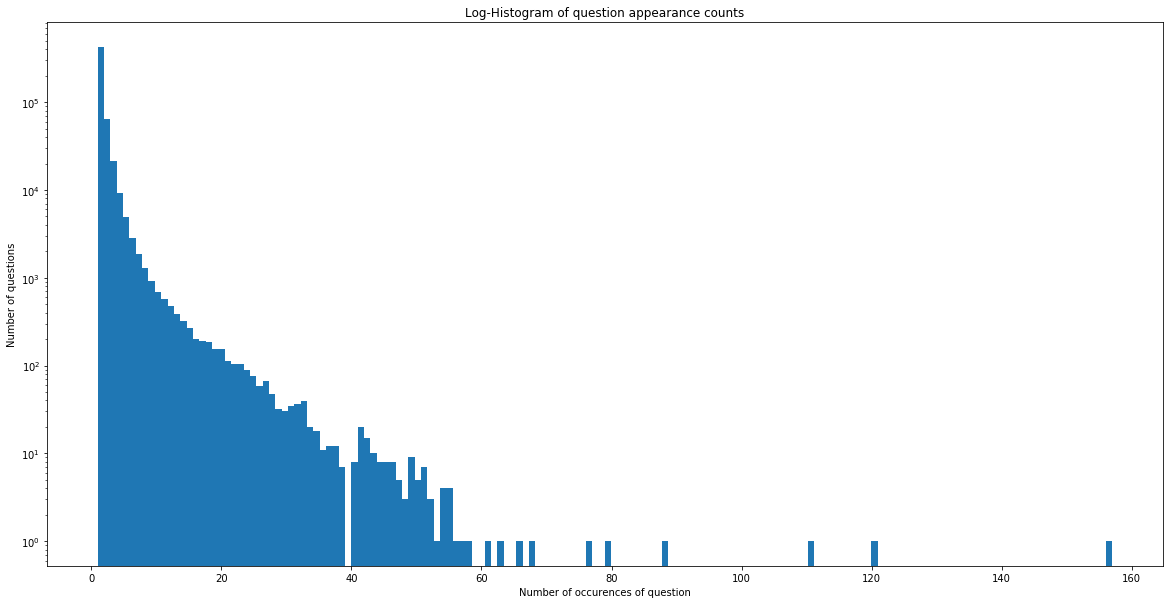

In [60]:
plt.figure(figsize=(20, 10))

plt.hist(q.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

In [65]:
df.groupby(["qid1","qid2"])["id"].count().max()

1

1 so no duplicates

In [67]:
#null values checking
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [70]:
df=df.drop(df.index[[105780,201841,363362]])

In [71]:
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate


In [72]:
df.to_csv("C:/Users/STUDENT/Desktop/datasets/quora/trained.csv", encoding='utf-8', index=False)